In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows
print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Display basic information about the dataset
print(dataset.info())

# Display statistical summary for numeric columns
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# Fill missing values in 'Age' with the median
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

# Drop 'Cabin' column due to too many missing values
dataset.drop(columns=['Cabin'], inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Verify no missing values remain
print(dataset.isnull().sum())


C:\Users\AA\AppData\Local\Temp\ipykernel_10476\1140759426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\AA\AppData\Local\Temp\ipykernel_10476\1140759426.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)


In [5]:
# Fill missing values in the 'Age' column with the median value
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

# Fill missing values in the 'Embarked' column with the most frequent value (mode)
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

# Optionally, you can check if there are any remaining missing values
print(dataset.isnull().sum())
dataset.to_csv('titanic-dataset-cleaned.csv', index=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [6]:
# Remove duplicate rows from the dataset
dataset = dataset.drop_duplicates()

# Check if there are any remaining duplicates
print(f"Remaining duplicates: {dataset.duplicated().sum()}")


Remaining duplicates: 0


In [7]:
# Calculate IQR for numerical columns like 'Age' and 'Fare'
Q1 = dataset[['Age', 'Fare']].quantile(0.25)
Q3 = dataset[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers in 'Age' and 'Fare'
dataset = dataset[(dataset['Age'] >= lower_bound['Age']) & (dataset['Age'] <= upper_bound['Age'])]
dataset = dataset[(dataset['Fare'] >= lower_bound['Fare']) & (dataset['Fare'] <= upper_bound['Fare'])]

# Check the size of the dataset after removing outliers
print(f"Remaining rows after removing outliers: {len(dataset)}")


Remaining rows after removing outliers: 721


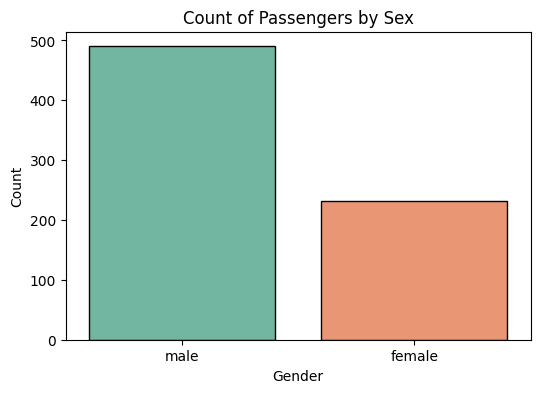

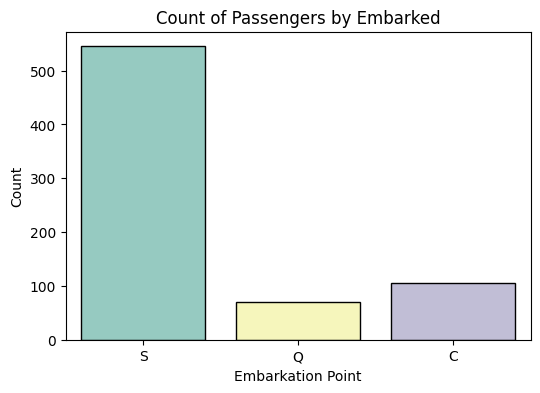

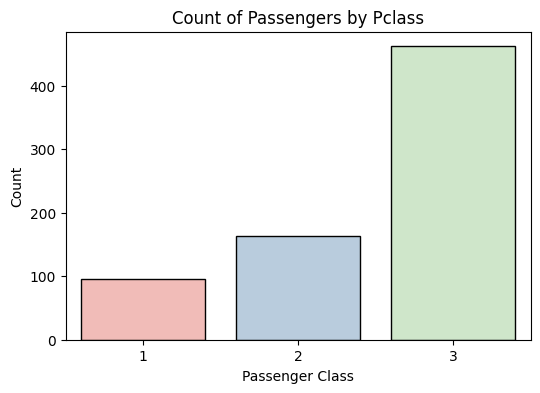

In [15]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Bar chart for 'Sex' column with thin borders and custom color
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=dataset, linewidth=1, edgecolor='black', palette='Set2')
plt.title('Count of Passengers by Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar chart for 'Embarked' column with thin borders and custom color
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=dataset, linewidth=1, edgecolor='black', palette='Set3')
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

# Bar chart for 'Pclass' column with thin borders and custom color
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=dataset, linewidth=1, edgecolor='black', palette='Pastel1')
plt.title('Count of Passengers by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


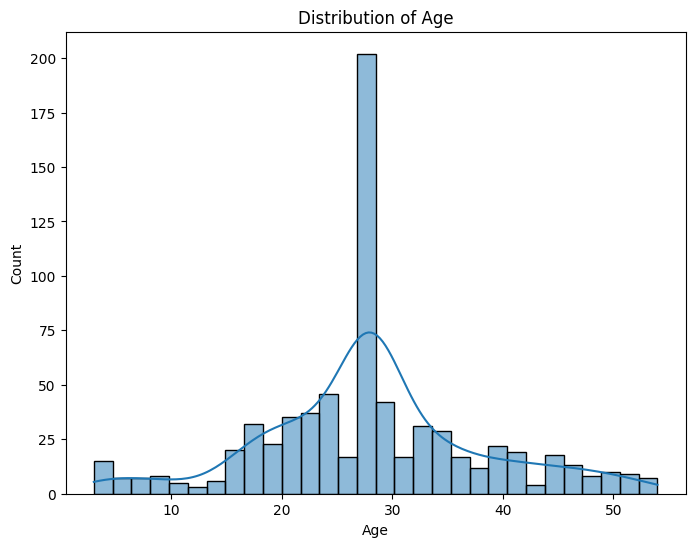

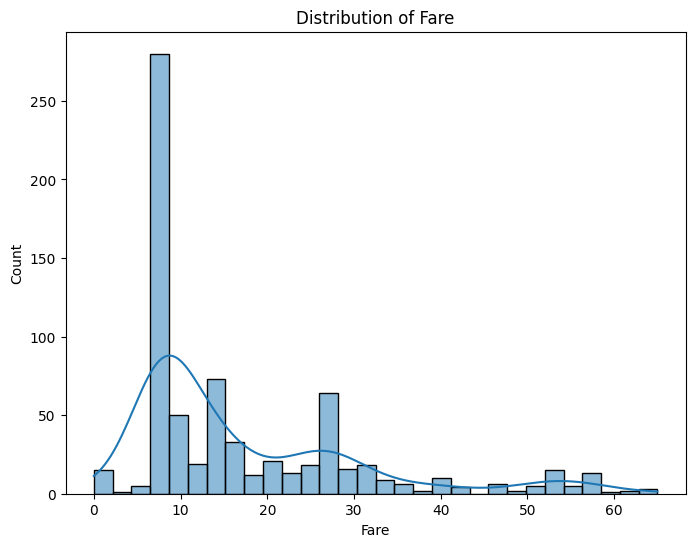

In [13]:
# Histogram for 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Histogram for 'Fare' column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()


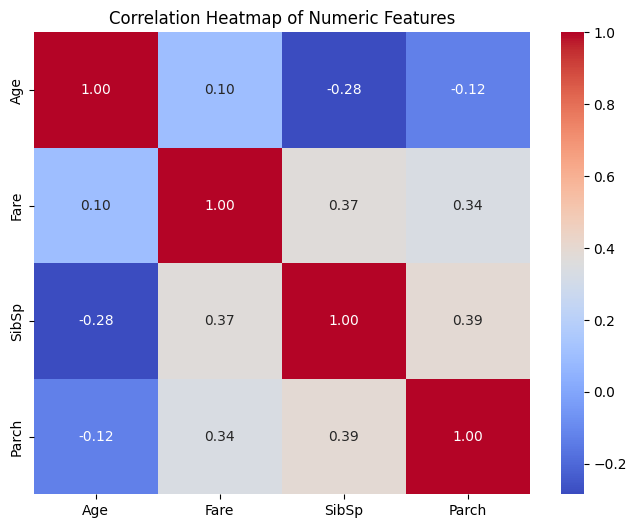

In [14]:
# Generate a correlation matrix for numeric features
corr_matrix = dataset[['Age', 'Fare', 'SibSp', 'Parch']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
